# Final Project - Word Cloud

For this project, I created a "word cloud" from a text by writing a script.  This script needed to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, I provided a file that contains text only.  
Now I uploaded input file here so that your script will be able to process it. It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once get the following final line of output, the code is done executing.

In [80]:
# Here are all the installs and imports needed for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>

To upload the text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [81]:
# This is the uploader widget
import fileupload


def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* which word cloud script can process. 

The function in the cell below iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.

In [82]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!1’2“3”4567890()-[]{},.;:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just",\
    "in","on","not","so","up","into","us","out","for","said","could","would","there","like","upon","about","then","back"]
    
    cad=file_contents.lower()
    for p in punctuations:
        if p in cad:
            cad=cad.replace(p,"")

    words_list=cad.split()

    dictio={}
    for word in words_list:
        if word not in dictio and word not in uninteresting_words and word.isalpha():
            dictio[word]=1
        elif word not in uninteresting_words and word.isalpha():
            dictio[word]+=1

#    wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(dictio)
    return cloud.to_array()

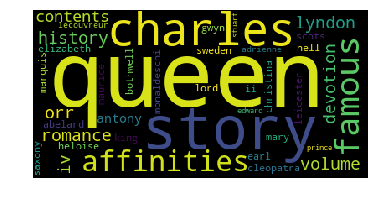

In [83]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()